In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,NaN,3.09000,NaN,NaN,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.4285,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.9963,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.6601,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.5226,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.6278,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.0951,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.9254,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.9516,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	6
float64		column 3	12
float64		column 4	24
float64		column 5	18
float64		column 6	24
float64		column 7	25
float64		column 8	12
float64		column 9	25
float64		column 10	36
float64		column 11	12
float64		column 12	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,393.000000,394.000000,388.000000,376.000000,382.000000,376.000000,375.000000,388.000000,375.000000,364.000000,388.000000,382.000000
mean,-0.075051,0.051835,2.033572,1.919943,1.972649,1.967205,2.022097,1.975489,1.977444,2.050468,1.979260,1.940428
std,2.566832,2.746269,1.131633,1.147866,1.158149,1.129378,1.155256,1.142797,1.153132,1.161636,1.151919,1.189628
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.052335,0.003618,0.007321,0.007019,0.055837,0.030430,0.001972
25%,-0.681130,-0.835295,1.121975,0.955030,0.910282,1.028333,1.002765,1.019525,1.075250,1.052975,0.926330,0.846313
50%,-0.063249,0.015595,2.086550,1.807600,1.967150,2.013500,2.100400,1.926100,2.080200,2.096400,1.935200,1.914800
75%,0.785490,0.887540,2.971475,2.899325,3.002600,2.946650,2.973000,3.027900,2.945800,3.077600,2.968700,2.973425
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

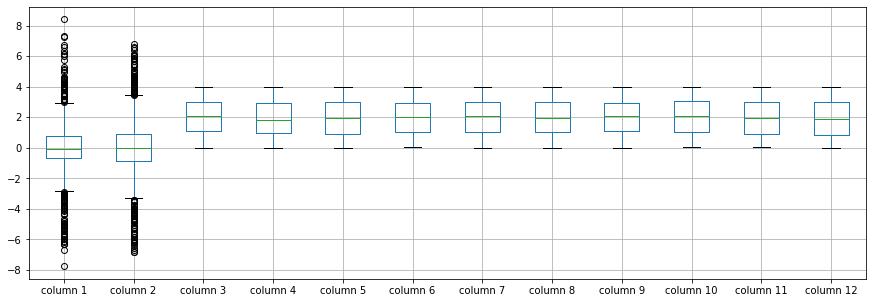

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.075051
column 2     0.051835
column 3     2.033572
column 4     1.919943
column 5     1.972649
column 6     1.967205
column 7     2.022097
column 8     1.975489
column 9     1.977444
column 10    2.050468
column 11    1.979260
column 12    1.940428
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.006732,-0.054721,-0.061578,0.011016,0.041190,-0.037859,0.034556,-0.025919,0.032428,0.082340,-0.041710
column 2,-0.006732,1.000000,-0.044690,0.060359,-0.090264,-0.116584,0.013130,-0.032278,0.002807,0.063253,-0.031874,0.050419
column 3,-0.054721,-0.044690,1.000000,0.018187,-0.012485,-0.042488,-0.100852,0.080371,0.091068,-0.027530,-0.075337,-0.005667
column 4,-0.061578,0.060359,0.018187,1.000000,-0.014480,0.102528,-0.010107,0.067107,-0.003254,0.105200,-0.005792,-0.032734
column 5,0.011016,-0.090264,-0.012485,-0.014480,1.000000,0.075934,0.027128,0.017207,-0.005980,0.009272,-0.024876,-0.015421
column 6,0.041190,-0.116584,-0.042488,0.102528,0.075934,1.000000,-0.003248,0.063892,0.008227,-0.008893,0.026098,-0.052056
column 7,-0.037859,0.013130,-0.100852,-0.010107,0.027128,-0.003248,1.000000,-0.027928,0.061556,0.036597,0.002511,-0.046940
column 8,0.034556,-0.032278,0.080371,0.067107,0.017207,0.063892,-0.027928,1.000000,0.070290,-0.147591,-0.041823,-0.014985
column 9,-0.025919,0.002807,0.091068,-0.003254,-0.005980,0.008227,0.061556,0.070290,1.000000,-0.004741,0.013935,0.077072
column 10,0.032428,0.063253,-0.027530,0.105200,0.009272,-0.008893,0.036597,-0.147591,-0.004741,1.000000,-0.012637,0.029925


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+26,12+26+26,12+26+26+26,12+26+26+26+26,12+26+26+26+26+26,12+26+26+26+26+26+26,12+26+26+26+26+26+26+26,12+26+26+26+26+26+26,12+26+26+26+26+26,12+26+26+26+26,12+26+26+26,12+26+26,12+26,12], vae_layer = False, seed = 26)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.670056228637694
Epoch: 1 , loss: 26.652621536254884
Epoch: 2 , loss: 26.594091491699217
Epoch: 3 , loss: 26.483761978149413
Epoch: 4 , loss: 26.35250358581543
Epoch: 5 , loss: 25.46346954345703
Epoch: 6 , loss: 23.46349807739258
Epoch: 7 , loss: 22.519954986572266
Epoch: 8 , loss: 21.80648796081543
Epoch: 9 , loss: 21.48798454284668
Epoch: 10 , loss: 21.161359634399414
Epoch: 11 , loss: 20.899062271118165
Epoch: 12 , loss: 20.548550872802736
Epoch: 13 , loss: 20.331001434326172
Epoch: 14 , loss: 20.023147048950197
Epoch: 15 , loss: 19.916396026611327
Epoch: 16 , loss: 19.63816635131836
Epoch: 17 , loss: 19.422537689208983
Epoch: 18 , loss: 19.516865158081053
Epoch: 19 , loss: 19.159927978515626
Epoch: 20 , loss: 19.33518455505371
Epoch: 21 , loss: 19.42893280029297
Epoch: 22 , loss: 19.12769599914551
Epoch: 23 , loss: 19.184177322387697
Epoch: 24 , loss: 18.648726348876952
Epoch: 25 , loss: 19.02355

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,4.384973,0.0,3.67488,4.097604,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(24.569452853538717, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.15047945072985458

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     1.658434
column 4     1.530306
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    1.553739
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,4.600383,3.09000,4.45831,4.607954,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.428500,0.14333,1.19480,2.131800,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.996300,2.21730,3.90290,1.514400,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.660100,2.35270,0.66126,3.135100,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.522600,0.98475,3.10940,3.656400,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.627800,3.29400,1.08500,0.157400,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.095100,3.79360,0.12790,0.542490,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.925400,1.84110,3.47730,0.954960,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.951600,0.27800,0.99059,3.437400,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AW_5(imp).xlsx", index=False, header=False)